# Exploratory Data Analysis and Visualization #

All the tables are stored in PostgreSQL. As part of this notebook, upload the datasets from PostgreS and merge all the datasets for easy correlation and analysis.

In this notebook we will do EDA and visualizations on the Brazilian e-commerce data having 100K orders from 2016 till 2018.

## Set-up working environment ##

In [170]:
# import the necessary libraries needed for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

# Get the files from the database and do EDA #

In [172]:
from dotenv import load_dotenv
load_dotenv()

# Import get_dataframe function from the sql module
from sql_functions_capstone import get_dataframe
import pandas as pd

# Set schema for accessing Postgres
schema = 'e_commerce'

## Get Order Items Dataset ## 

In [173]:
file_name = 'order_items_dataset'
sql = f'select * from {schema}.{file_name}'
order_items_df = get_dataframe(sql)
order_items_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87


## Get Orders Dataset ##

In [174]:
file_name = 'orders_dataset'
sql = f'select * from {schema}.{file_name}'
orders_df = get_dataframe(sql)
orders_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,2.00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.00,1.00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.00,0.00


## Get Order Payments Dataset ##

In [175]:
file_name = 'order_payments_dataset'
sql = f'select * from {schema}.{file_name}'
order_payments_df = get_dataframe(sql)
order_payments_df.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


## Get Orders Reviews Dataset ##

In [176]:
file_name = 'orders_reviews_dataset'
sql = f'select * from {schema}.{file_name}'
orders_reviews_df = get_dataframe(sql)
orders_reviews_df.head(3)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24


## Get Products dataset ##

In [177]:
file_name = 'products_dataset'
sql = f'select * from {schema}.{file_name}'
products_df = get_dataframe(sql)
products_df.head(3)

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.00,287.00,1.00,225.00,16.00,10.00,14.00,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.00,276.00,1.00,"1,000.00",30.00,18.00,20.00,art
2,96bd76ec8810374ed1b65e291975717f,46.00,250.00,1.00,154.00,18.00,9.00,15.00,sports_leisure


## Get Sellers Dataset ##

In [178]:
file_name = 'sellers_dataset'
sql = f'select * from {schema}.{file_name}'
sellers_df = get_dataframe(sql)
sellers_df.head(3)

,seller_id,seller_zip_code_prefix
0,3442f8959a84dea7ee197c632cb2df15,13023
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031


## Get Customers Dataset ##

In [179]:
file_name = 'customers_dataset'
sql = f'select * from {schema}.{file_name}'
customers_df = get_dataframe(sql)
customers_df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151


## Get Geolocation Final Dataset ##

In [180]:
file_name = 'geolocation_final_dataset_eng'
sql = f'select * from {schema}.{file_name}'
geolocation_df = get_dataframe(sql)
geolocation_df.head(3)

,geolocation_zip_code_prefix,avg_geolocation_lat,avg_geolocation_lan,geolocation_city,geolocation_state
0,1001,-23.55,-46.63,sao paulo,SP
1,1002,-23.55,-46.64,sao paulo,SP
2,1003,-23.55,-46.64,sao paulo,SP


# Merge all the dataframes #

## Merge Orders Dataset with Order Items Dataset ##

In [181]:
orders_orderitems_df = pd.merge(orders_df, order_items_df, on='order_id')
orders_orderitems_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.00,1.00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.00,0.00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [182]:
display(orders_df.shape)
display(order_items_df.shape)
display(orders_orderitems_df.shape)

(99441, 10)

(112650, 7)

(112650, 16)

## Merge Products Dataset with the above merged dataset ##

In [183]:
orders_items_products_df = pd.merge(orders_orderitems_df, products_df, on='product_id')
orders_items_products_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day,...,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,2.00,...,29.99,8.72,40.00,268.00,4.00,500.00,19.00,8.00,13.00,housewares
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,2.00,1.00,...,29.99,7.78,40.00,268.00,4.00,500.00,19.00,8.00,13.00,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5.00,1.00,...,29.99,7.78,40.00,268.00,4.00,500.00,19.00,8.00,13.00,housewares


In [184]:
display(orders_orderitems_df.shape)
display(products_df.shape)
display(orders_items_products_df.shape)

(112650, 16)

(32951, 9)

(112650, 24)

## Merge Sellers Dataset with above merged files ##

In [185]:
orders_products_sellers_df = pd.merge(orders_items_products_df, sellers_df, on='seller_id')
orders_products_sellers_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day,...,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,2.00,...,8.72,40.00,268.00,4.00,500.00,19.00,8.00,13.00,housewares,9350
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,2.00,1.00,...,7.78,40.00,268.00,4.00,500.00,19.00,8.00,13.00,housewares,9350
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5.00,1.00,...,7.78,40.00,268.00,4.00,500.00,19.00,8.00,13.00,housewares,9350


In [186]:
display(orders_items_products_df.shape)
display(sellers_df.shape)
display(orders_products_sellers_df.shape)

(112650, 24)

(3095, 2)

(112650, 25)

## Merge geolocation dataset with above merged files and rename geolocation columns with prefix seller ##

In [187]:
orders_products_sellers_geo_df = pd.merge(orders_products_sellers_df, geolocation_df, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
orders_products_sellers_geo_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,geolocation_zip_code_prefix,avg_geolocation_lat,avg_geolocation_lan,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,2.00,...,19.00,8.00,13.00,housewares,9350,9350,-23.68,-46.44,maua,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,2.00,1.00,...,19.00,8.00,13.00,housewares,9350,9350,-23.68,-46.44,maua,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5.00,1.00,...,19.00,8.00,13.00,housewares,9350,9350,-23.68,-46.44,maua,SP


In [188]:
display(orders_products_sellers_df.shape)
display(geolocation_df.shape)
display(orders_products_sellers_geo_df.shape)

(112650, 25)

(19058, 5)

(112650, 30)

In [189]:
orders_products_sellers_geo_df.drop(columns='geolocation_zip_code_prefix', inplace=True)
display(orders_products_sellers_geo_df.shape)
orders_products_sellers_geo_df.head(3)

(112650, 29)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,avg_geolocation_lat,avg_geolocation_lan,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,2.00,...,500.00,19.00,8.00,13.00,housewares,9350,-23.68,-46.44,maua,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,2.00,1.00,...,500.00,19.00,8.00,13.00,housewares,9350,-23.68,-46.44,maua,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5.00,1.00,...,500.00,19.00,8.00,13.00,housewares,9350,-23.68,-46.44,maua,SP


In [190]:
orders_products_sellers_geo_df.rename(columns={'avg_geolocation_lat':'seller_lat', 'avg_geolocation_lan':'seller_lon', 'geolocation_city':'seller_city', 'geolocation_state':'seller_state'}, inplace=True)
orders_products_sellers_geo_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_delivery_customer_day_difference', 'order_process_day',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix', 'seller_lat',
       'seller_lon', 'seller_city', 'seller_state'],
      dtype='object')

## Merge Customers Dataset with above merged files ##

In [191]:
orders_products_sellers_customers_df = pd.merge(orders_products_sellers_geo_df, customers_df, on='customer_id')
orders_products_sellers_customers_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day,...,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_lat,seller_lon,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,2.00,...,8.00,13.00,housewares,9350,-23.68,-46.44,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,2.00,1.00,...,8.00,13.00,housewares,9350,-23.68,-46.44,maua,SP,3a51803cc0d012c3b5dc8b7528cb05f7,3366
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5.00,1.00,...,8.00,13.00,housewares,9350,-23.68,-46.44,maua,SP,ef0996a1a279c26e7ecbd737be23d235,2290


In [192]:
display(orders_products_sellers_geo_df.shape)
display(customers_df.shape)
display(orders_products_sellers_customers_df.shape)

(112650, 29)

(99441, 3)

(112650, 31)

## Merge geolocation dataset with above merged files and rename geolocation columns with prefix customer ##

In [193]:
orders_products_sellers_customers_geo_df = pd.merge(orders_products_sellers_customers_df, geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
orders_products_sellers_customers_geo_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day,...,seller_lon,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,geolocation_zip_code_prefix,avg_geolocation_lat,avg_geolocation_lan,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,2.00,...,-46.44,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,3149,-23.58,-46.59,sao paulo,SP
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,1.00,...,-47.66,piracicaba,SP,8a4002923e801e3120a11070fd31c9e2,3149,3149,-23.58,-46.59,sao paulo,SP
2,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,1.00,...,-47.66,piracicaba,SP,8a4002923e801e3120a11070fd31c9e2,3149,3149,-23.58,-46.59,sao paulo,SP


In [194]:
orders_products_sellers_customers_geo_df.drop(columns='geolocation_zip_code_prefix', inplace=True)
display(orders_products_sellers_customers_geo_df.shape)
orders_products_sellers_customers_geo_df.head(3)


(112650, 35)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day,...,seller_lat,seller_lon,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,avg_geolocation_lat,avg_geolocation_lan,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,2.00,...,-23.68,-46.44,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,-23.58,-46.59,sao paulo,SP
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,1.00,...,-22.71,-47.66,piracicaba,SP,8a4002923e801e3120a11070fd31c9e2,3149,-23.58,-46.59,sao paulo,SP
2,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,1.00,...,-22.71,-47.66,piracicaba,SP,8a4002923e801e3120a11070fd31c9e2,3149,-23.58,-46.59,sao paulo,SP


In [195]:
orders_products_sellers_customers_geo_df.rename(columns={'avg_geolocation_lat':'customer_lat', 'avg_geolocation_lan':'customer_lon', 'geolocation_city':'customer_city', 'geolocation_state':'customer_state'}, inplace=True)
orders_products_sellers_customers_geo_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_delivery_customer_day_difference', 'order_process_day',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix', 'seller_lat',
       'seller_lon', 'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_lat', 'customer_lon',
       'customer_city', 'customer_state'],
      dtype='object')

## Merge Orders dataset with order review dataset ##

In [266]:
order_rev_df = pd.merge(orders_df, orders_reviews_df, on='order_id', how='left')
display(order_rev_df.shape)
order_rev_df.head(3)

(99992, 14)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.00,2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.00,1.00,8d5266042046a06655c8db133d120ba5,4.00,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.00,0.00,e73b67b67587f7644d5bd1a52deb1b01,5.00,2018-08-18,2018-08-22 19:07:58


In [267]:
order_rev_df[order_rev_df['order_status']=='unavailable']['review_score'].value_counts()

1.00    463
2.00     43
5.00     36
3.00     35
4.00     20
Name: review_score, dtype: int64

In [259]:
order_rev_df[(order_rev_df['order_status']=='shipped') & (order_rev_df['review_score']==1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day,review_id,review_score,review_creation_date,review_answer_timestamp
43,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,NaN,0.00,5853e27c64b89e222c5e4edf78bec3d4,1,2018-07-01,2018-07-11 20:41:18
161,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08,NaN,2.00,a205cb50c298eea221ae32dc498db2c3,1,2017-06-14,2017-06-16 12:13:47
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03,NaN,6.00,bf8ad702d153b8c1c73328591242c7d1,1,2018-08-05,2018-08-05 13:47:00
305,b68d69564a79dea4776afa33d1d2fcab,de1e5517fb50896bbdcff5814fb31802,shipped,2018-02-28 08:57:03,2018-02-28 10:40:35,2018-03-05 16:10:13,NaT,2018-03-23,NaN,5.00,dde1e40541d41f6ef8b16aec2913338c,1,2018-03-25,2018-03-25 03:41:01
373,5869074071e0f56e9085dc3742c97b2a,7203eb38fea2b4a15dd6c39575314aa4,shipped,2018-06-08 20:06:48,2018-06-12 04:35:37,2018-06-12 14:09:00,NaT,2018-06-28,NaN,3.00,4221f3f3b5ffcf57d8eb3497d3332479,1,2018-07-05,2018-07-05 11:56:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97408,2321337240c200736e346c2445003fd3,c2d4ece79b2ae91bb5c600af6b6672a8,shipped,2018-05-09 20:21:21,2018-05-10 20:17:45,2018-05-11 14:45:00,NaT,2018-05-23,NaN,1.00,d5ee3f1981fe3552a2e21a0958b9d338,1,2018-05-26,2018-05-26 13:37:27
97931,a0aac3e398c28aa322af7ab1a9b24c85,26146c75d3530d94eeceb9498dc1fa68,shipped,2017-05-10 21:12:11,2017-05-10 21:25:13,2017-05-16 14:35:30,NaT,2017-05-26,NaN,5.00,25a3b59e5590ec2ceb9cc84ba23111ca,1,2017-05-28,2017-06-04 08:49:20
97933,a2b014e25e47aea28f291905e3fb2ac2,86ad106f2775aacaff72975bc434b8de,shipped,2017-11-23 15:46:00,2017-11-23 15:55:29,2017-11-27 12:32:08,NaT,2017-12-13,NaN,3.00,8084637f9ae0803466c11369e3d125b1,1,2017-12-15,2017-12-19 18:55:37
98897,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24,NaN,11.00,bd9593be6fc941b697f3494739afa780,1,2018-07-26,2018-07-26 09:42:51


## Seller Review Dataset ##
Merge order items dataset with above dataset

In [268]:
seller_review_df = pd.merge(order_rev_df, order_items_df, on='order_id')
display(seller_review_df.shape)
seller_review_df.head(3)

(113314, 20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.00,2017-10-11,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.00,1.00,8d5266042046a06655c8db133d120ba5,4.00,2018-08-08,2018-08-08 18:37:50,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.00,0.00,e73b67b67587f7644d5bd1a52deb1b01,5.00,2018-08-18,2018-08-22 19:07:58,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [269]:
seller_review_df[seller_review_df['order_status']=='delivered'].seller_id.nunique()

2970

In [270]:
seller_review_df.seller_id.nunique()

3095

# Understand the data #

In [271]:
orders_products_sellers_customers_geo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   order_id                                112650 non-null  object        
 1   customer_id                             112650 non-null  object        
 2   order_status                            112650 non-null  object        
 3   order_purchase_timestamp                112650 non-null  datetime64[ns]
 4   order_approved_at                       112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date            111456 non-null  datetime64[ns]
 6   order_delivered_customer_date           110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date           112650 non-null  datetime64[ns]
 8   order_delivery_customer_day_difference  110196 non-null  float64       
 9   order_process_day                    

In [272]:
df = orders_products_sellers_customers_geo_df.copy()
display(df.shape)
df.head(3)

(112650, 35)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_customer_day_difference,order_process_day,...,seller_lat,seller_lon,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lon,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.00,2.00,...,-23.68,-46.44,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,-23.58,-46.59,sao paulo,SP
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,1.00,...,-22.71,-47.66,piracicaba,SP,8a4002923e801e3120a11070fd31c9e2,3149,-23.58,-46.59,sao paulo,SP
2,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2.00,1.00,...,-22.71,-47.66,piracicaba,SP,8a4002923e801e3120a11070fd31c9e2,3149,-23.58,-46.59,sao paulo,SP


# Explore and Clean your Data #

## Drop the product description columns from the dataframe as we don't need it ##

In [273]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_delivery_customer_day_difference', 'order_process_day',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix', 'seller_lat',
       'seller_lon', 'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_lat', 'customer_lon',
       'customer_city', 'customer_state'],
      dtype='object')

In [274]:
df.drop(columns=['order_delivery_customer_day_difference','order_process_day','product_name_length','product_description_length'], inplace=True)

In [275]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1603
seller_zip_code_prefix              0
seller_lat                          0
seller_lon                          0
seller_city                         0
seller_state                        0
customer_unique_id                  0
customer_zip

In [276]:
df['order_status'].value_counts()

delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

Since order status as shipped, cancelled, invoiced, processing, unavailable and approved are all together 2%, we will ignore these status in our further analysis

In [247]:
df[df['order_status']=='unavailable'].isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     7
order_delivered_customer_date    7
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
seller_zip_code_prefix           0
seller_lat                       0
seller_lon                       0
seller_city                      0
seller_state                     0
customer_unique_id               0
customer_zip_code_prefix         0
customer_lat                     0
customer_lon        

In [277]:
df_delivered = df[df['order_status']=='delivered'].copy()

In [231]:
df_delivered.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        2
order_delivered_customer_date       8
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_photos_qty               1537
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1537
seller_zip_code_prefix              0
seller_lat                          0
seller_lon                          0
seller_city                         0
seller_state                        0
customer_unique_id                  0
customer_zip

In [284]:
df_delivered[df_delivered['order_delivered_carrier_date'].isnull()][['shipping_limit_date', 'order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']]

,shipping_limit_date,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [281]:
df_delivered.loc[52481, 'order_delivered_carrier_date'] = df_delivered.loc[52481, 'shipping_limit_date']

In [283]:
df_delivered.loc[56046, 'order_delivered_carrier_date'] = df_delivered.loc[56046, 'shipping_limit_date']
df_delivered.loc[56046, 'order_delivered_customer_date'] = df_delivered.loc[56046, 'order_estimated_delivery_date']

In [287]:
df_delivered[df_delivered['order_delivered_customer_date'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_lat,seller_lon,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lon,customer_city,customer_state


In [286]:
df_delivered.loc[6982, 'order_delivered_customer_date'] = df_delivered.loc[6982, 'order_estimated_delivery_date']
df_delivered.loc[9067, 'order_delivered_customer_date'] = df_delivered.loc[9067, 'order_estimated_delivery_date']
df_delivered.loc[11659, 'order_delivered_customer_date'] = df_delivered.loc[11659, 'order_estimated_delivery_date']
df_delivered.loc[32985, 'order_delivered_customer_date'] = df_delivered.loc[32985, 'order_estimated_delivery_date']
df_delivered.loc[91320, 'order_delivered_customer_date'] = df_delivered.loc[91320, 'order_estimated_delivery_date']
df_delivered.loc[106877, 'order_delivered_customer_date'] = df_delivered.loc[106877, 'order_estimated_delivery_date']
df_delivered.loc[110097, 'order_delivered_customer_date'] = df_delivered.loc[110097, 'order_estimated_delivery_date']

In [288]:
df_delivered.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_photos_qty               1537
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1537
seller_zip_code_prefix              0
seller_lat                          0
seller_lon                          0
seller_city                         0
seller_state                        0
customer_unique_id                  0
customer_zip

In [289]:
df_delivered[df_delivered['order_approved_at'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_lat,seller_lon,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lon,customer_city,customer_state
859,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,1,c6dd917a0be2a704582055949915ab32,...,-23.55,-46.54,sao paulo,SP,c8822fce1d0bfa7ddf0da24fff947172,27945,-22.37,-41.79,macae,RJ
1288,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,1,0e20a07ca1714df21f9b07ca3bf7c682,...,-21.25,-48.32,jaboticabal,SP,8a9a08c7ca8900a200d83cf838a07e0b,6708,-23.59,-46.85,cotia,SP
9644,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,1,c3b271f47e73d0c9ccf1b43b7606c705,...,-21.76,-48.83,ibitinga,SP,d49f3dae6bad25d05160fc17aca5942d,36400,-20.66,-43.78,conselheiro lafaiete,MG
13887,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,1,4fd676d9c4723d475026e40aeae56957,...,-23.54,-46.51,sao paulo,SP,5a4fa4919cbf2b049e72be460a380e5b,35620,-19.16,-45.45,abaete,MG
14989,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,1,02a79d79e818ad0be36cfc843a6af7ad,...,-23.53,-46.61,sao paulo,SP,c4c0011e639bdbcf26059ddc38bd3c18,13225,-23.23,-46.84,varzea paulista,SP
28653,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,1,5ab02ca028398131a5ae91401eb49788,...,-25.44,-49.19,pinhais,PR,6ff8b0d7b35d5c945633b8d60165691b,11030,-23.98,-46.30,santos,SP
48790,2babbb4b15e6d2dfe95e2de765c97bce,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31,1,c6dd917a0be2a704582055949915ab32,...,-23.55,-46.54,sao paulo,SP,f79be7c08dd24b72d34634f1b89333a4,65110,-2.55,-44.14,sao jose de ribamar,MA
48807,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21,1,8c5876b1c7768217964f353bc7e64393,...,-23.93,-46.33,santos,SP,bc1896dc77f49e6dec880445a9b443a3,21020,-22.83,-43.28,rio de janeiro,RJ
48808,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21,2,8c5876b1c7768217964f353bc7e64393,...,-23.93,-46.33,santos,SP,bc1896dc77f49e6dec880445a9b443a3,21020,-22.83,-43.28,rio de janeiro,RJ
72359,51eb2eebd5d76a24625b31c33dd41449,07a2a7e0f63fd8cb757ed77d4245623c,delivered,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29,1,7868a64aa111bbb4f41f8e1146c0becb,...,-21.76,-48.83,ibitinga,SP,79af1bbf230a2630487975aa5d7d6220,37660,-22.55,-45.78,paraisopolis,MG


In [159]:
#df.loc[df['order_delivered_carrier_date'].isnull()][df[df['order_delivered_carrier_date'].isnull()]['order_status'] == 'delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_lat,seller_lon,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lon,customer_city,customer_state
52481,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,1,44c2baf621113fa7ac95fa06b4afbc68,...,-23.77,-52.45,terra boa,PR,a2ac81ecc3704410ae240e74d4f0af40,13334,-23.08,-47.20,indaiatuba,SP
56046,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,1,30b5b5635a79548a48d04162d971848f,...,-23.54,-46.73,sao paulo,SP,d77cf4be2654aa70ef150f8bfec076a6,91330,-30.03,-51.16,porto alegre,RS


In [124]:
#df['order_delivered_carrier_date'] = df.apply(lambda x: x['shiping_limit_date'] if ('order_id'=='2aa91108853cecb43c84a5dc5b277475' and 'order_status'=='delivered') else x['order_delivered_carrier_date'], axis=1)

## Build new columns or data augmentation ##

In [294]:
# extract year, month out of Order dataset
df_delivered['order_year'] = df_delivered['order_purchase_timestamp'].dt.year
df_delivered['order_month'] = df_delivered['order_purchase_timestamp'].dt.month
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_lat,seller_lon,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_lat,customer_lon,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-23.68,-46.44,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,-23.58,-46.59,sao paulo,SP
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,1,6cc44821f36f3156c782da72dd634e47,...,-22.71,-47.66,piracicaba,SP,8a4002923e801e3120a11070fd31c9e2,3149,-23.58,-46.59,sao paulo,SP
2,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2,6cc44821f36f3156c782da72dd634e47,...,-22.71,-47.66,piracicaba,SP,8a4002923e801e3120a11070fd31c9e2,3149,-23.58,-46.59,sao paulo,SP


In [333]:
df_delivered['actual_processing_days'] = (df_delivered['order_delivered_carrier_date']-df_delivered['order_purchase_timestamp']).dt.days
df_delivered['estimated_processing_days'] = (df_delivered['shipping_limit_date']-df_delivered['order_purchase_timestamp']).dt.days
df_delivered['actual_shipping_days'] = (df_delivered['order_delivered_customer_date']-df_delivered['order_delivered_carrier_date']).dt.days
df_delivered['estimated_shipping_days'] = (df_delivered['order_estimated_delivery_date']-df_delivered['shipping_limit_date']).dt.days
df_delivered['approval_days'] = (df_delivered['order_approved_at']-df_delivered['order_purchase_timestamp'])
df_delivered.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_lon,customer_city,customer_state,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-46.59,sao paulo,SP,2017,10,2,4,6,11,0 days 00:10:42
1,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,1,6cc44821f36f3156c782da72dd634e47,...,-46.59,sao paulo,SP,2018,3,1,6,1,6,0 days 00:42:15
2,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2,6cc44821f36f3156c782da72dd634e47,...,-46.59,sao paulo,SP,2018,3,1,6,1,6,0 days 00:42:15


In [304]:
df_delivered['approval_days'].mean()

Timedelta('0 days 10:31:05.509983481')

In [305]:
df_delivered['approval_days'].fillna(value=df_delivered['approval_days'].mean(), inplace=True)

## Missing Values ##

In [306]:
df_delivered.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_photos_qty               1537
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1537
seller_zip_code_prefix              0
seller_lat                          0
seller_lon                          0
seller_city                         0
seller_state                        0
customer_unique_id                  0
customer_zip

In [36]:
# check for unique values of order status
#df.order_status.value_counts()

delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

## Descriptive Statistics ##

In [334]:
df_delivered.describe()

,order_item_id,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_lat,...,customer_zip_code_prefix,customer_lat,customer_lon,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days
count,"110,197.00","110,197.00","110,197.00","108,660.00","110,179.00","110,179.00","110,179.00","110,179.00","110,197.00","110,197.00",...,"110,197.00","110,197.00","110,197.00","110,197.00","110,197.00","110,197.00","110,197.00","110,197.00","110,197.00",110182
mean,1.20,119.98,19.95,2.21,"2,089.68",30.14,16.56,22.99,"24,467.84",-22.80,...,"35,157.39",-21.23,-46.22,"2,017.54",6.03,2.79,6.41,8.73,16.77,0 days 10:31:05.509983481
std,0.71,182.30,15.70,1.72,"3,741.61",16.12,13.41,11.69,"27,624.67",2.70,...,"29,903.43",5.56,4.03,0.50,3.23,3.67,3.19,8.61,8.13,0 days 20:59:10.947320758
min,1.00,0.85,0.00,1.00,0.00,7.00,2.00,6.00,"1,001.00",-32.08,...,"1,003.00",-33.69,-72.67,"2,016.00",1.00,-172.00,2.00,-17.00,-25.00,0 days 00:00:00
25%,1.00,39.90,13.08,1.00,300.00,18.00,8.00,15.00,"6,429.00",-23.61,...,"11,310.00",-23.59,-48.12,"2,017.00",3.00,1.00,5.00,4.00,12.00,0 days 00:12:59
50%,1.00,74.90,16.26,1.00,700.00,25.00,13.00,20.00,"13,568.00",-23.42,...,"24,344.00",-22.93,-46.64,"2,018.00",6.00,2.00,6.00,7.00,16.00,0 days 00:21:01
75%,1.00,134.17,21.15,3.00,"1,800.00",38.00,20.00,30.00,"28,035.00",-21.76,...,"59,065.00",-20.14,-43.67,"2,018.00",8.00,4.00,7.00,11.00,21.00,0 days 15:09:52
max,21.00,"6,735.00",409.68,20.00,"40,425.00",105.00,105.00,118.00,"99,730.00",-2.50,...,"99,980.00",42.18,-8.72,"2,018.00",12.00,125.00,97.00,205.00,147.00,30 days 21:26:37


In [323]:
df_delivered[df_delivered['estimated_processing_days']==df_delivered['estimated_processing_days'].max()][['shipping_limit_date', 'order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','actual_processing_days','estimated_processing_days','actual_shipping_days', 'estimated_shipping_days']]

,shipping_limit_date,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days
821,2020-04-09 22:35:08,2017-05-23 22:28:36,2017-05-29 02:03:28,2017-06-09 13:35:54,2017-10-11,5,1052,11,-912
822,2020-04-09 22:35:08,2017-05-23 22:28:36,2017-05-29 02:03:28,2017-06-09 13:35:54,2017-10-11,5,1052,11,-912


In [330]:
# Update the shipping limit date having data as 2020 to order delivered customer date
df_delivered.loc[821, 'shipping_limit_date'] = df_delivered.loc[821, 'order_delivered_carrier_date']
df_delivered.loc[822, 'shipping_limit_date'] = df_delivered.loc[822, 'order_delivered_carrier_date']

In [337]:
df_delivered[df_delivered['estimated_shipping_days'] < 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_lon,customer_city,customer_state,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days
84,7eff82e591eb71184b50c3dfbfc7fd45,ca825b3898a4679cb0b6be754c778310,delivered,2018-04-25 07:16:14,2018-04-27 03:51:07,2018-05-03 19:06:00,2018-05-08 19:21:22,2018-05-04,1,fc8595227785863846b7daa2ae3f2c9b,...,-47.11,campinas,SP,2018,4,8,8,5,-1,1 days 20:34:53
160,4bb092f397e56a28c0207882c135f5bc,a37aca35a5ff14fefa24de86e12048f3,delivered,2017-11-28 07:49:45,2017-11-28 07:59:29,2017-12-15 01:38:40,2018-01-05 16:19:24,2017-12-22,1,02ce467092b184e71d3967d29110adc1,...,-43.36,rio de janeiro,RJ,2017,11,16,36,21,-13,0 days 00:09:44
427,7563e13fcf7f6c6d8db57ef0c5760c87,ea523606564418ccc7fa53b7a081c510,delivered,2018-07-29 15:25:12,2018-07-30 15:24:44,2018-07-31 10:27:00,2018-08-01 18:44:41,2018-08-02,1,880e2c1d5c4b60504e6b0a0c8bf89a1f,...,-46.69,sao paulo,SP,2018,7,1,4,1,-2,0 days 23:59:32
428,7563e13fcf7f6c6d8db57ef0c5760c87,ea523606564418ccc7fa53b7a081c510,delivered,2018-07-29 15:25:12,2018-07-30 15:24:44,2018-07-31 10:27:00,2018-08-01 18:44:41,2018-08-02,2,880e2c1d5c4b60504e6b0a0c8bf89a1f,...,-46.69,sao paulo,SP,2018,7,1,4,1,-2,0 days 23:59:32
491,4cfe6efc40f9645ef7b88440a1c64149,e8a9e053759d650b77440883c7b27235,delivered,2018-08-04 22:42:52,2018-08-07 04:10:17,2018-08-07 15:33:00,2018-08-19 17:08:42,2018-08-09,1,d017a2151d543a9885604dc62a3d9dcc,...,-46.78,sao paulo,SP,2018,8,2,4,12,-1,2 days 05:27:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111319,818ea45f3cef61b3f0f71a0491c1b636,10ef7cc862362919f25225bbade1e1ef,delivered,2018-08-17 19:51:19,2018-08-20 16:31:41,2018-08-22 13:16:00,2018-08-23 14:36:54,2018-08-22,1,1a758361b1c10b3ffe3d3373332de319,...,-46.54,sao paulo,SP,2018,8,4,4,1,-1,2 days 20:40:22
111825,256c2127e05b924a7cbf69f95e3c4830,85fa08abb6d9f3bdec5bc578ee0a1b39,delivered,2018-08-14 23:20:59,2018-08-16 03:24:07,2018-08-17 14:22:00,2018-08-20 20:42:50,2018-08-23,1,542a646898298499b45840efc15775e4,...,-46.75,sao paulo,SP,2018,8,2,9,3,-2,1 days 04:03:08
111980,c4a813b981516ec9f56994ad042d9fbd,d8b15e859d1c6cbc4c1178953d544cae,delivered,2018-08-09 18:06:55,2018-08-11 02:35:13,2018-08-16 14:07:00,2018-08-17 17:46:51,2018-08-14,1,9060e916ed476d0269ad330786a201ee,...,-46.70,sao paulo,SP,2018,8,6,4,1,-1,1 days 08:28:18
112435,f67e17b84d5d476bc5478e79ed177a3d,8de96756639d09772d2f364c7c81c32c,delivered,2018-08-07 10:20:26,2018-08-09 03:50:16,2018-08-09 14:18:00,2018-08-10 17:48:31,2018-08-20,1,3fc3d637781e5d185455013606a6e2cd,...,-46.84,embu,SP,2018,8,2,12,1,-1,1 days 17:29:50


In [339]:
df_delivered['actual_processing_days'].nsmallest(15)

22238   -172
65767     -5
300       -1
1181      -1
1762      -1
2049      -1
2315      -1
2663      -1
3073      -1
3798      -1
5678      -1
5927      -1
8930      -1
8955      -1
9870      -1
Name: actual_processing_days, dtype: int64

In [ ]:
df_delivered

In [309]:
df_delivered['actual_processing_days'].nsmallest(15)

22238   -172
65767     -5
300       -1
1181      -1
1762      -1
2049      -1
2315      -1
2663      -1
3073      -1
3798      -1
5678      -1
5927      -1
8930      -1
8955      -1
9870      -1
Name: actual_processing_days, dtype: int64

In [40]:
# Update the order status as canceled for above two records
df.loc[df['approval_days'] == 60, 'order_status'] = 'canceled'

In [41]:
df[df['approval_days'] == 60]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_process_day,order_item_id,...,customer_lon,customer_city,customer_state,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days
9658,2e5dc86c8c4aa663549caf5e31de840d,6225eed02b7d1a110b6e5b5dd4c8bd31,canceled,2017-02-03 00:04:49,2017-04-04 10:56:48,NaT,NaT,2017-03-31,NaN,1,...,-43.78,conselheiro lafaiete,MG,2017,2,NaN,69,NaN,-14,60.00
9659,2e5dc86c8c4aa663549caf5e31de840d,6225eed02b7d1a110b6e5b5dd4c8bd31,canceled,2017-02-03 00:04:49,2017-04-04 10:56:48,NaT,NaT,2017-03-31,NaN,2,...,-43.78,conselheiro lafaiete,MG,2017,2,NaN,69,NaN,-14,60.00


In [61]:
# Check for null values in order_delivered_carrier_date versus order_status
df2 = df[df['order_delivered_carrier_date'].isnull()].copy()

In [62]:
df2.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_process_day,order_item_id,...,customer_lon,customer_city,customer_state,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days
130,4aa353cc7496d36dad27d939dfdfe59e,2a8da2a879305eff063b850d75415039,invoiced,2018-03-26 00:13:51,2018-03-26 00:30:29,NaT,NaT,2018-04-06,NaN,1,...,-47.04,campinas,SP,2018,3,NaN,4,NaN,6,0.00
205,711b9be9c346d9ecdb9d38a5e1e7e39b,81e4aed5ab4253757305267b80712689,invoiced,2016-10-04 13:38:37,2016-10-04 14:08:38,NaT,NaT,2016-11-24,NaN,1,...,-46.99,jaguariuna,SP,2016,10,NaN,17,NaN,33,0.00
470,79ec7fcffa4121dbb55b945aee306e12,002348c1099e3229276c8ad7d4ddc702,processing,2018-01-10 12:28:22,2018-01-11 03:09:22,NaT,NaT,2018-02-02,NaN,1,...,-47.06,itupeva,SP,2018,1,NaN,6,NaN,15,0.00


In [63]:
df2['order_status'].value_counts()

canceled       468
invoiced       359
processing     355
unavailable      7
approved         3
delivered        2
Name: order_status, dtype: int64

In [65]:
df2[df2['order_status'] == 'delivered'][['shipping_limit_date', 'order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','actual_processing_days','estimated_processing_days','actual_shipping_days', 'estimated_shipping_days']]

,shipping_limit_date,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days
52481,2017-10-18 10:07:16,2017-09-29 08:52:58,NaT,2017-11-20 19:44:47,2017-11-14,NaN,19,NaN,26
56046,2017-06-04 23:30:16,2017-05-25 23:22:43,NaT,NaT,2017-06-23,NaN,10,NaN,18


## Update the main combined df for these two records with estimated dates ##

### Estimated Shipping days is negative. Check for column shipping limit date ###

In [42]:
df.shipping_limit_date.describe()

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_2141/3903744016.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.shipping_limit_date.describe()


count                  112650
unique                  93318
top       2017-07-21 18:25:23
freq                       21
first     2016-09-19 00:15:34
last      2020-04-09 22:35:08
Name: shipping_limit_date, dtype: object

Since there are data for 2020 shipping date as well which is way beyond our timeframe, we need to deal with these records

In [43]:
df1 = df[df['estimated_shipping_days'] < 0].copy()

In [44]:
df1['order_id'].duplicated().value_counts()

False    318
True      54
Name: order_id, dtype: int64

In [45]:
df1.order_status.value_counts()

delivered     354
canceled       10
shipped         4
invoiced        3
processing      1
Name: order_status, dtype: int64

In [52]:
df1.estimated_shipping_days.value_counts()

-1      244
-2       70
-4       18
-3       11
-6        7
-5        6
-7        4
-912      3
-14       2
-16       2
-13       1
-914      1
-25       1
-11       1
-23       1
Name: estimated_shipping_days, dtype: int64

In [56]:
df1[(df1['order_status'] == 'shipped') and df1['order_delivered_carrier_date'].isnull]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [46]:
df1[df1['order_status'] == 'shipped'][['shipping_limit_date', 'order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','actual_processing_days','estimated_processing_days','actual_shipping_days', 'estimated_shipping_days']]

,shipping_limit_date,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days
10250,2020-02-03 20:23:22,2017-03-14 19:23:22,2017-03-16 14:31:15,NaT,2017-08-04,1.00,1056,NaN,-914
80094,2018-08-10 14:35:16,2018-08-07 21:40:46,2018-08-09 14:06:00,NaT,2018-08-10,1.00,2,NaN,-1
103326,2016-10-26 18:25:19,2016-09-04 21:15:19,2016-10-18 13:14:51,NaT,2016-10-20,43.00,51,NaN,-7
103327,2016-10-26 18:25:19,2016-09-04 21:15:19,2016-10-18 13:14:51,NaT,2016-10-20,43.00,51,NaN,-7


In [51]:
df1[df1['estimated_shipping_days'] < -190][['order_status','shipping_limit_date', 'order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','actual_processing_days','estimated_processing_days','actual_shipping_days', 'estimated_shipping_days']]

,order_status,shipping_limit_date,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days
821,delivered,2020-04-09 22:35:08,2017-05-23 22:28:36,2017-05-29 02:03:28,2017-06-09 13:35:54,2017-10-11,5.00,1052,11.00,-912
822,delivered,2020-04-09 22:35:08,2017-05-23 22:28:36,2017-05-29 02:03:28,2017-06-09 13:35:54,2017-10-11,5.00,1052,11.00,-912
10250,shipped,2020-02-03 20:23:22,2017-03-14 19:23:22,2017-03-16 14:31:15,NaT,2017-08-04,1.00,1056,NaN,-914
45730,canceled,2020-02-05 03:30:51,2017-03-16 02:30:51,NaT,NaT,2017-08-08,NaN,1056,NaN,-912


In [ ]:
df1[df1['estimated_shipping_days'] < -190 and df1['order_status']]

In [48]:
df1['shipping_to_order_est']= (df1['order_estimated_delivery_date'] - df1['shipping_limit_date']).dt.days
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_process_day,order_item_id,...,customer_city,customer_state,order_year,order_month,actual_processing_days,estimated_processing_days,actual_shipping_days,estimated_shipping_days,approval_days,shipping_to_order_est
84,7eff82e591eb71184b50c3dfbfc7fd45,ca825b3898a4679cb0b6be754c778310,delivered,2018-04-25 07:16:14,2018-04-27 03:51:07,2018-05-03 19:06:00,2018-05-08 19:21:22,2018-05-04,8.00,1,...,campinas,SP,2018,4,8.00,8,5.00,-1,1.00,-1
160,4bb092f397e56a28c0207882c135f5bc,a37aca35a5ff14fefa24de86e12048f3,delivered,2017-11-28 07:49:45,2017-11-28 07:59:29,2017-12-15 01:38:40,2018-01-05 16:19:24,2017-12-22,16.00,1,...,rio de janeiro,RJ,2017,11,16.00,36,21.00,-13,0.00,-13
427,7563e13fcf7f6c6d8db57ef0c5760c87,ea523606564418ccc7fa53b7a081c510,delivered,2018-07-29 15:25:12,2018-07-30 15:24:44,2018-07-31 10:27:00,2018-08-01 18:44:41,2018-08-02,1.00,1,...,sao paulo,SP,2018,7,1.00,4,1.00,-2,0.00,-2
428,7563e13fcf7f6c6d8db57ef0c5760c87,ea523606564418ccc7fa53b7a081c510,delivered,2018-07-29 15:25:12,2018-07-30 15:24:44,2018-07-31 10:27:00,2018-08-01 18:44:41,2018-08-02,1.00,2,...,sao paulo,SP,2018,7,1.00,4,1.00,-2,0.00,-2
491,4cfe6efc40f9645ef7b88440a1c64149,e8a9e053759d650b77440883c7b27235,delivered,2018-08-04 22:42:52,2018-08-07 04:10:17,2018-08-07 15:33:00,2018-08-19 17:08:42,2018-08-09,2.00,1,...,sao paulo,SP,2018,8,2.00,4,12.00,-1,2.00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111825,256c2127e05b924a7cbf69f95e3c4830,85fa08abb6d9f3bdec5bc578ee0a1b39,delivered,2018-08-14 23:20:59,2018-08-16 03:24:07,2018-08-17 14:22:00,2018-08-20 20:42:50,2018-08-23,2.00,1,...,sao paulo,SP,2018,8,2.00,9,3.00,-2,1.00,-2
111980,c4a813b981516ec9f56994ad042d9fbd,d8b15e859d1c6cbc4c1178953d544cae,delivered,2018-08-09 18:06:55,2018-08-11 02:35:13,2018-08-16 14:07:00,2018-08-17 17:46:51,2018-08-14,6.00,1,...,sao paulo,SP,2018,8,6.00,4,1.00,-1,1.00,-1
112143,d800ed6cc3e992f98f1b25959791706d,f1a302b1bf40fa1112e7cc6341de9368,invoiced,2018-07-31 16:01:43,2018-07-31 17:31:24,NaT,NaT,2018-08-06,NaN,1,...,sao paulo,SP,2018,7,NaN,6,NaN,-1,0.00,-1
112435,f67e17b84d5d476bc5478e79ed177a3d,8de96756639d09772d2f364c7c81c32c,delivered,2018-08-07 10:20:26,2018-08-09 03:50:16,2018-08-09 14:18:00,2018-08-10 17:48:31,2018-08-20,2.00,1,...,embu,SP,2018,8,2.00,12,1.00,-1,1.00,-1


In [49]:
df['actual_shipping_days'].nsmallest(30)

41728    -17.00
41729    -17.00
101787    -8.00
101788    -8.00
110590    -8.00
110591    -8.00
54473     -7.00
54474     -7.00
54475     -7.00
3963      -6.00
8559      -6.00
59494     -6.00
59495     -6.00
81478     -5.00
81479     -5.00
1828      -3.00
1829      -3.00
1830      -3.00
5905      -2.00
5906      -2.00
17034     -2.00
17035     -2.00
49260     -2.00
49261     -2.00
72248     -2.00
72249     -2.00
76247     -2.00
76248     -2.00
81946     -2.00
81947     -2.00
Name: actual_shipping_days, dtype: float64

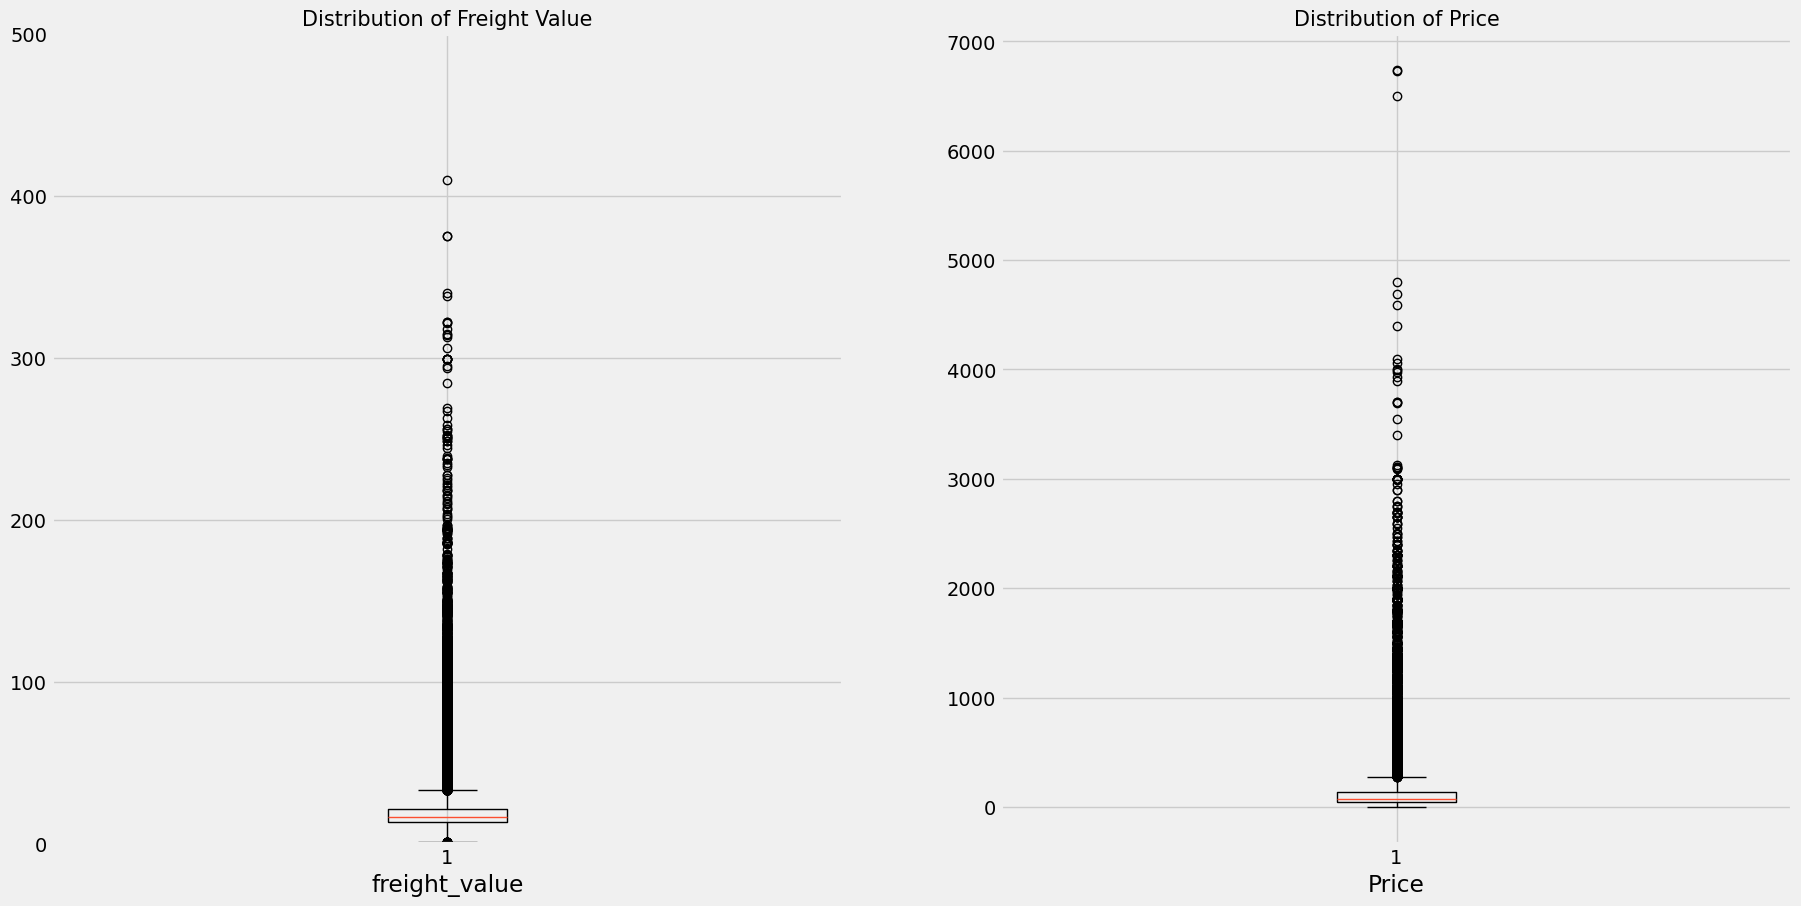

In [50]:
fig, ax = plt.subplots(1,2,figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.title('Distribution of numeric columns', fontsize=20)
#fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
#plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0].boxplot(x = order_items_df['freight_value']) # creates boxplot for number of views
ax[0].set_xlabel(xlabel="freight_value") # sets the label for the ticks on the x-axis
ax[0].set_ylim(0,500) # limits the y-axis values from 0 to 2000000 
ax[0].set_title("Distribution of Freight Value", fontsize = 15); # sets title for subplot

ax[1].boxplot(x = order_items_df['price'])
ax[1].set_xlabel("Price")
#ax[0][1].set_ylim(0,50000)
ax[1].set_title("Distribution of Price", fontsize = 15);